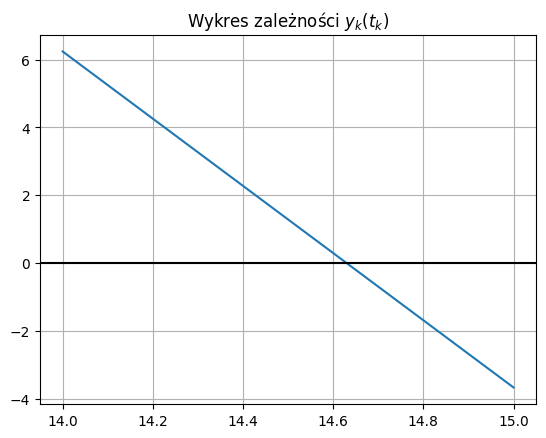

Całkowity czas lotu kuli to: 14.630041285100688s
Wysokość maksymalna jaką osiągnie kula to 123.22399897987808m
Prędkość podczas zderzenia się kuli z ziemią wynosi -9.901971608312113m/s


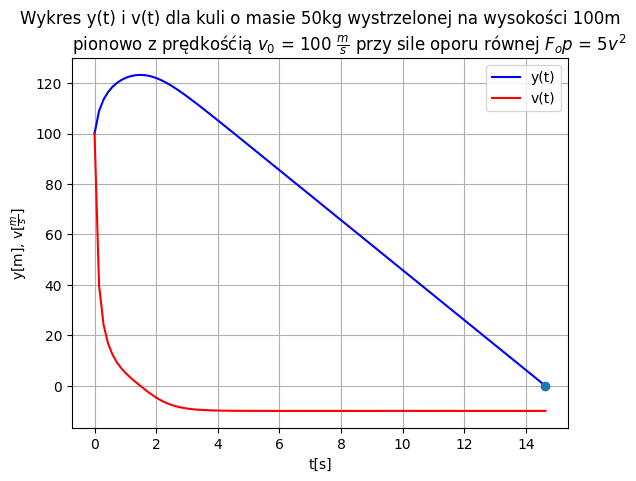

[100.          39.89591277  24.2471083   16.81156228  12.33896284
   9.21408406   6.85868776   4.91754605   3.23238112   1.70295557
   0.25209648  -1.1717508   -2.55343601  -3.83611817  -4.98383326
  -5.97664979  -6.81082089  -7.49589968  -8.04632725  -8.48011296
  -8.81877541  -9.08205746  -9.28334859  -9.43533505  -9.55055868
  -9.63963533  -9.70703026  -9.75641831  -9.79212349  -9.81911904
  -9.84115134  -9.85811776  -9.87031351  -9.87849469  -9.88387601
  -9.88813079  -9.89253578  -9.8963271   -9.89914541  -9.90085972
  -9.90154981  -9.9015063   -9.90123057  -9.90143485  -9.90246321
  -9.90366207  -9.90472022  -9.9054256   -9.90566064  -9.90540229
  -9.90472204  -9.90378588  -9.90285432  -9.90228238  -9.90252392
  -9.90403574  -9.90632199  -9.90871641  -9.91069625  -9.91188233
  -9.91203898  -9.91107411  -9.90903914  -9.90612906  -9.90268238
  -9.89918117  -9.89625103  -9.89466112  -9.89532413  -9.89832231
  -9.90188285  -9.90505987  -9.90720611  -9.90795708  -9.90723108
  -9.90522

In [31]:
from scipy.integrate import solve_ivp
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

m = 50 
y0 = 100
v0 = 100
g = 9.81

def f(t, r):
    y, v = r
    dy_dt = v
    dv_dt = -g - 5 * v*np.abs(v) / m
    return dy_dt, dv_dt

@np.vectorize
def y_k(t_f):
    t = np.linspace(0, t_f, 101)
    sol = solve_ivp(f, (0, t_f), (100, 100), t_eval=t) 
    y, v = sol.y  
    return y[-1]

t_f = np.linspace(14,15,1000)

plt.plot(t_f, y_k(t_f))
plt.grid()
plt.axhline(c="k")
plt.title("Wykres zależności $y_k$($t_k$)")
plt.show()

t_f = newton(y_k, 14.6)

t2 = np.linspace(0, t_f, 101)
sol2 = solve_ivp(f, (0, t_f), (100, 100), t_eval=t2) 
y2, v2 = sol2.y  

print(f'Całkowity czas lotu kuli to: {t_f}s')
print(f'Wysokość maksymalna jaką osiągnie kula to {max(y2)}m')
print(f'Prędkość podczas zderzenia się kuli z ziemią wynosi {v2[-1]}m/s')



plt.plot(t2,y2,"blue")
plt.plot(t2,v2,'red')

plt.plot(t_f,y2[-1],"o")
plt.grid()
plt.xlabel("t[s]")
plt.ylabel("y[m], v[$\\frac{m}{s}$]")
plt.title('Wykres y(t) i v(t) dla kuli o masie 50kg wystrzelonej na wysokości 100m\n \
          pionowo z prędkośćią $v_0$ = 100 $\\frac{m}{s}$ przy sile oporu równej $F_op$ = 5$v^2$')
plt.legend(['y(t)','v(t)'])
plt.show()
print(v2)
print(y2)
